In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from simulation_runner import run_experiment

In [2]:
# Definisi kombinasi yang akan diuji
workload_cases_to_test = ["Fokus Item Panas (80/20)", "Fokus Lokasi", "Terdistribusi Merata"]
lb_strategies_to_test = ["Sticky Session", "Least Connections", "Least Response Time", "Geographic", "Round Robin"]
cache_policies_to_test = ["LRU", "LFU", "FIFO"]

results = []

# Menggunakan tqdm untuk progress bar
total_combinations = len(workload_cases_to_test) * len(lb_strategies_to_test) * len(cache_policies_to_test)
pbar = tqdm(total=total_combinations, desc="Menjalankan Simulasi")

for case in workload_cases_to_test:
    for lb in lb_strategies_to_test:
        for cache_policy in cache_policies_to_test:
            result = run_experiment(
                    lb_strategy=lb, 
                    cache_policy=cache_policy, 
                    workload_case=case
                )
            results.append(result)
            pbar.update(1)
pbar.close()

# Konversi hasil ke DataFrame Pandas
df_results = pd.DataFrame(results)

Menjalankan Simulasi: 100%|██████████| 45/45 [00:00<00:00, 121.26it/s]


In [3]:
df_results

,Workload Case,LB Strategy,Cache Policy,Avg Resp Time (ms),Cache Hit Ratio (%),Requests per Server,Max Active Connection
0,Fokus Item Panas (80/20),Sticky Session,LRU,759.392667,36.1,"[325, 247, 428]","[0, 41, 83, 110, 131, 150, 149, 155, 152, 160]"
1,Fokus Item Panas (80/20),Sticky Session,LFU,732.874333,40.6,"[333, 236, 431]","[0, 41, 81, 113, 134, 155, 152, 159, 159, 156]"
2,Fokus Item Panas (80/20),Sticky Session,FIFO,782.520167,31.0,"[349, 251, 400]","[0, 51, 87, 111, 128, 147, 152, 154, 158, 159]"
3,Fokus Item Panas (80/20),Least Connections,LRU,896.668417,12.0,"[205, 400, 395]","[0, 34, 66, 94, 117, 134, 146, 152, 154, 157]"
4,Fokus Item Panas (80/20),Least Connections,LFU,870.977250,14.4,"[272, 480, 248]","[0, 34, 66, 96, 117, 133, 145, 155, 157, 157]"
5,Fokus Item Panas (80/20),Least Connections,FIFO,907.507250,12.5,"[407, 265, 328]","[0, 34, 66, 95, 116, 131, 144, 148, 151, 154]"
6,Fokus Item Panas (80/20),Least Response Time,LRU,866.417417,11.9,"[162, 713, 125]","[0, 63, 84, 102, 134, 144, 145, 155, 152, 161]"
7,Fokus Item Panas (80/20),Least Response Time,LFU,860.524250,15.6,"[225, 567, 208]","[0, 64, 92, 128, 128, 138, 145, 158, 158, 158]"
8,Fokus Item Panas (80/20),Least Response Time,FIFO,854.350417,12.8,"[171, 646, 183]","[0, 37, 90, 108, 136, 137, 153, 140, 152, 152]"
9,Fokus Item Panas (80/20),Geographic,LRU,665.168667,13.0,"[343, 319, 338]","[0, 41, 70, 99, 123, 142, 151, 157, 158, 158]"


In [4]:
# Membuat kolom gabungan untuk cache policy & metrik
df_results["Cache-Metric"] = df_results["Cache Policy"] + "_T"
df_results["Cache-Metric-Hit"] = df_results["Cache Policy"] + "_Hit"

# Salin dataframe dua kali: untuk waktu dan cache hit
df_t = df_results.pivot_table(
    index=["Workload Case", "LB Strategy"],
    columns="Cache Policy",
    values="Avg Resp Time (ms)"
).round(0)

df_hit = df_results.pivot_table(
    index=["Workload Case", "LB Strategy"],
    columns="Cache Policy",
    values="Cache Hit Ratio (%)"
).round(1)

# Gabungkan keduanya menjadi satu MultiIndex columns
df_merged = pd.DataFrame(index=df_t.index)
for policy in ["LRU", "LFU", "FIFO"]:
    df_merged[(policy, "T (ms)")] = df_t[policy]
    df_merged[(policy, "%")] = df_hit[policy]

# Urutkan kolom
df_merged = df_merged[[("LRU", "T (ms)"), ("LRU", "%"),
                       ("LFU", "T (ms)"), ("LFU", "%"),
                       ("FIFO", "T (ms)"), ("FIFO", "%")]]

# Atur ulang indeks agar seperti di tabel kamu
df_merged = df_merged.reset_index()

# Urutan strategi LB yang diinginkan
lb_order = ["Sticky Session", "Least Connections", "Least Response Time", "Geographic", "Round Robin"]

# Terapkan sebagai kategori berurutan
df_merged["LB Strategy"] = pd.Categorical(df_merged["LB Strategy"], categories=lb_order, ordered=True)

# Urutkan berdasarkan Workload + Strategi
df_merged = df_merged.sort_values(by=["Workload Case", "LB Strategy"])

# Tampilkan tabel akhir
df_merged.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
).set_caption("TABEL I. Hasil Eksperimen Simulasi").set_properties(**{'text-align': 'center'})

# Simpan ke Excel
df_merged.to_excel("hasil_simulasi_tabel2.xlsx", index=False)

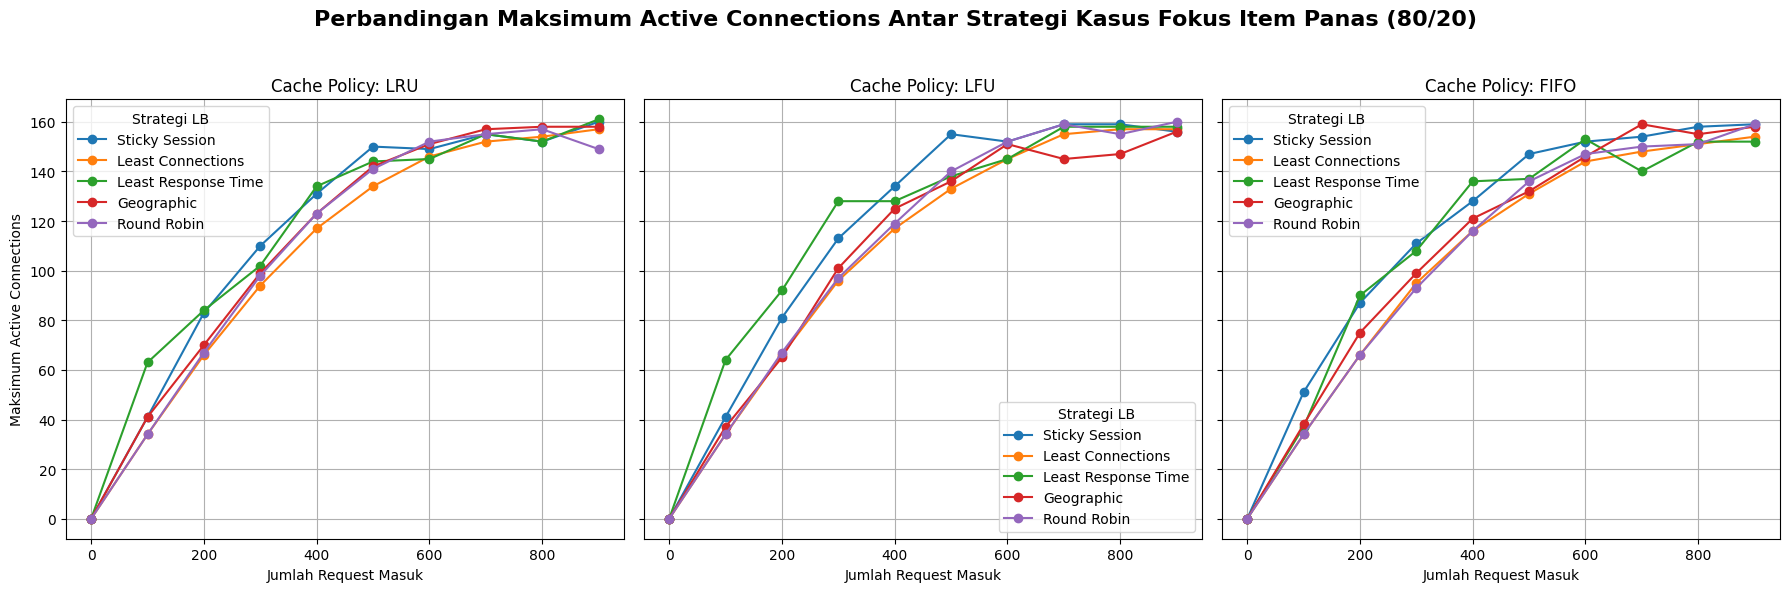

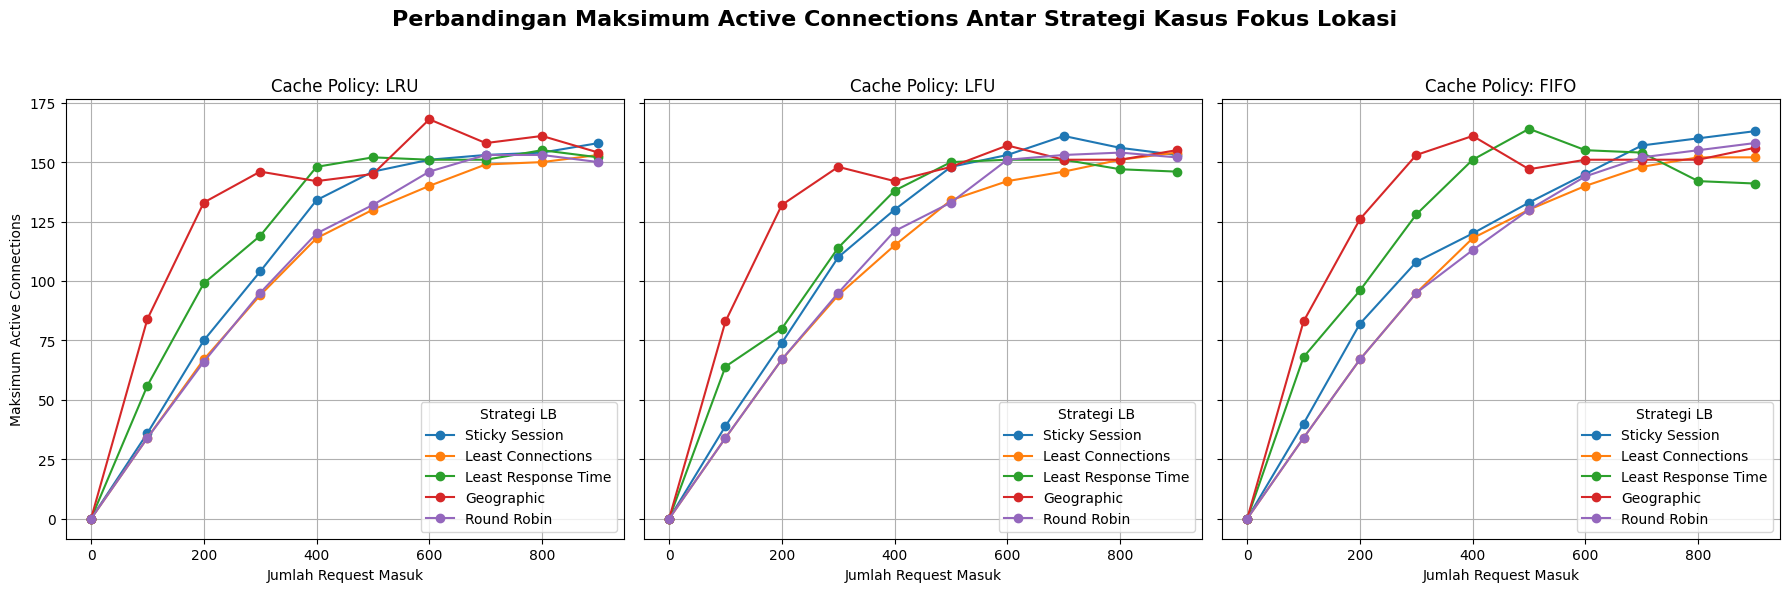

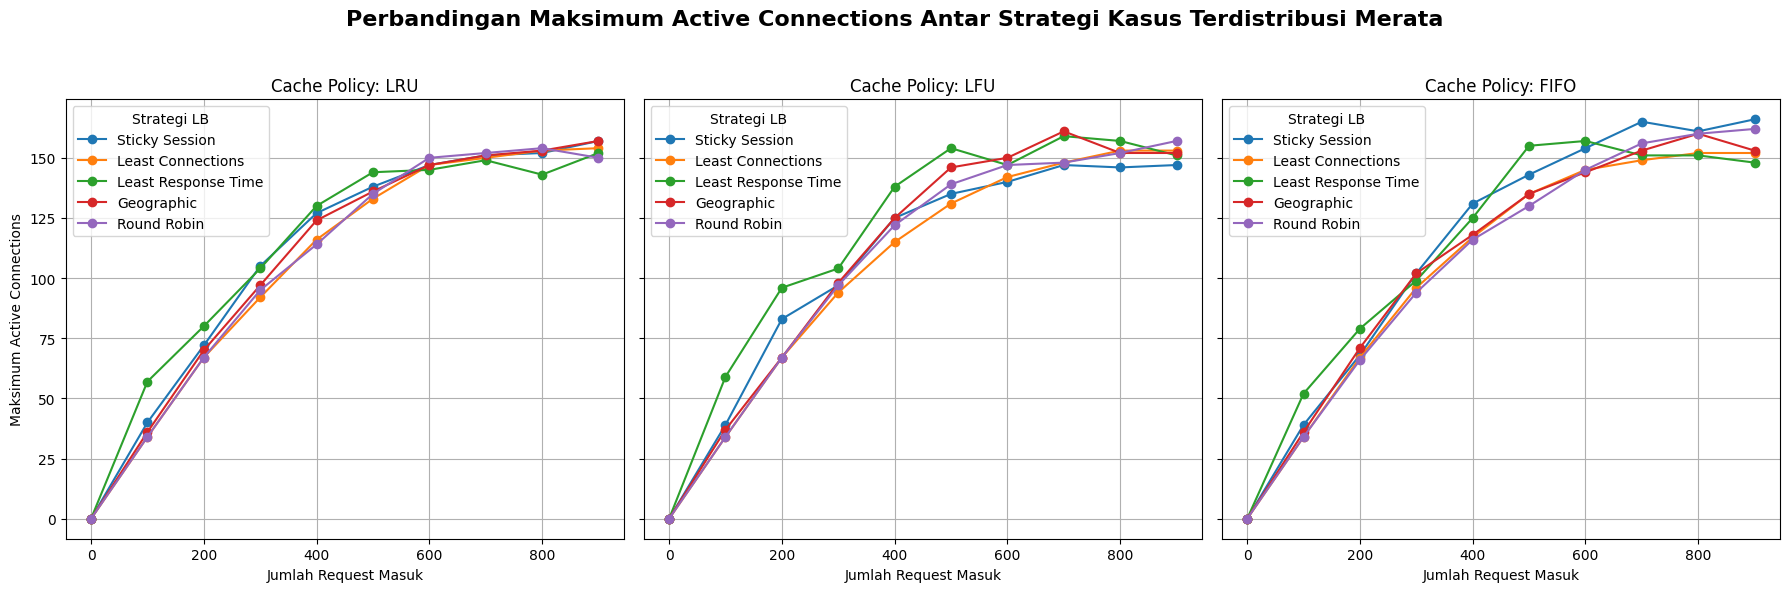

In [5]:
def plot_multi_strategy_max_conn(results, case="Fokus Item Panas (80/20)"):
    # Gunakan daftar kebijakan cache yang sudah didefinisikan
    policies = cache_policies_to_test  # ['LRU', 'LFU', 'FIFO']
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    for ax, policy in zip(axs, policies):
        filtered_results = [r for r in results if r['Workload Case'] == case and r['Cache Policy'] == policy]
        
        for result in filtered_results:
            max_conn_history = result["Max Active Connection"]
            x = [i * 100 for i in range(len(max_conn_history))]
            ax.plot(x, max_conn_history, label=result["LB Strategy"], marker='o')
        
        ax.set_title(f"Cache Policy: {policy}")
        ax.set_xlabel("Jumlah Request Masuk")
        ax.grid(True)
        if ax is axs[0]:
            ax.set_ylabel("Maksimum Active Connections")
        ax.legend(title="Strategi LB")
    
    plt.suptitle(f"Perbandingan Maksimum Active Connections Antar Strategi Kasus {case}", fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


for case in workload_cases_to_test:
    plot_multi_strategy_max_conn(results, case)



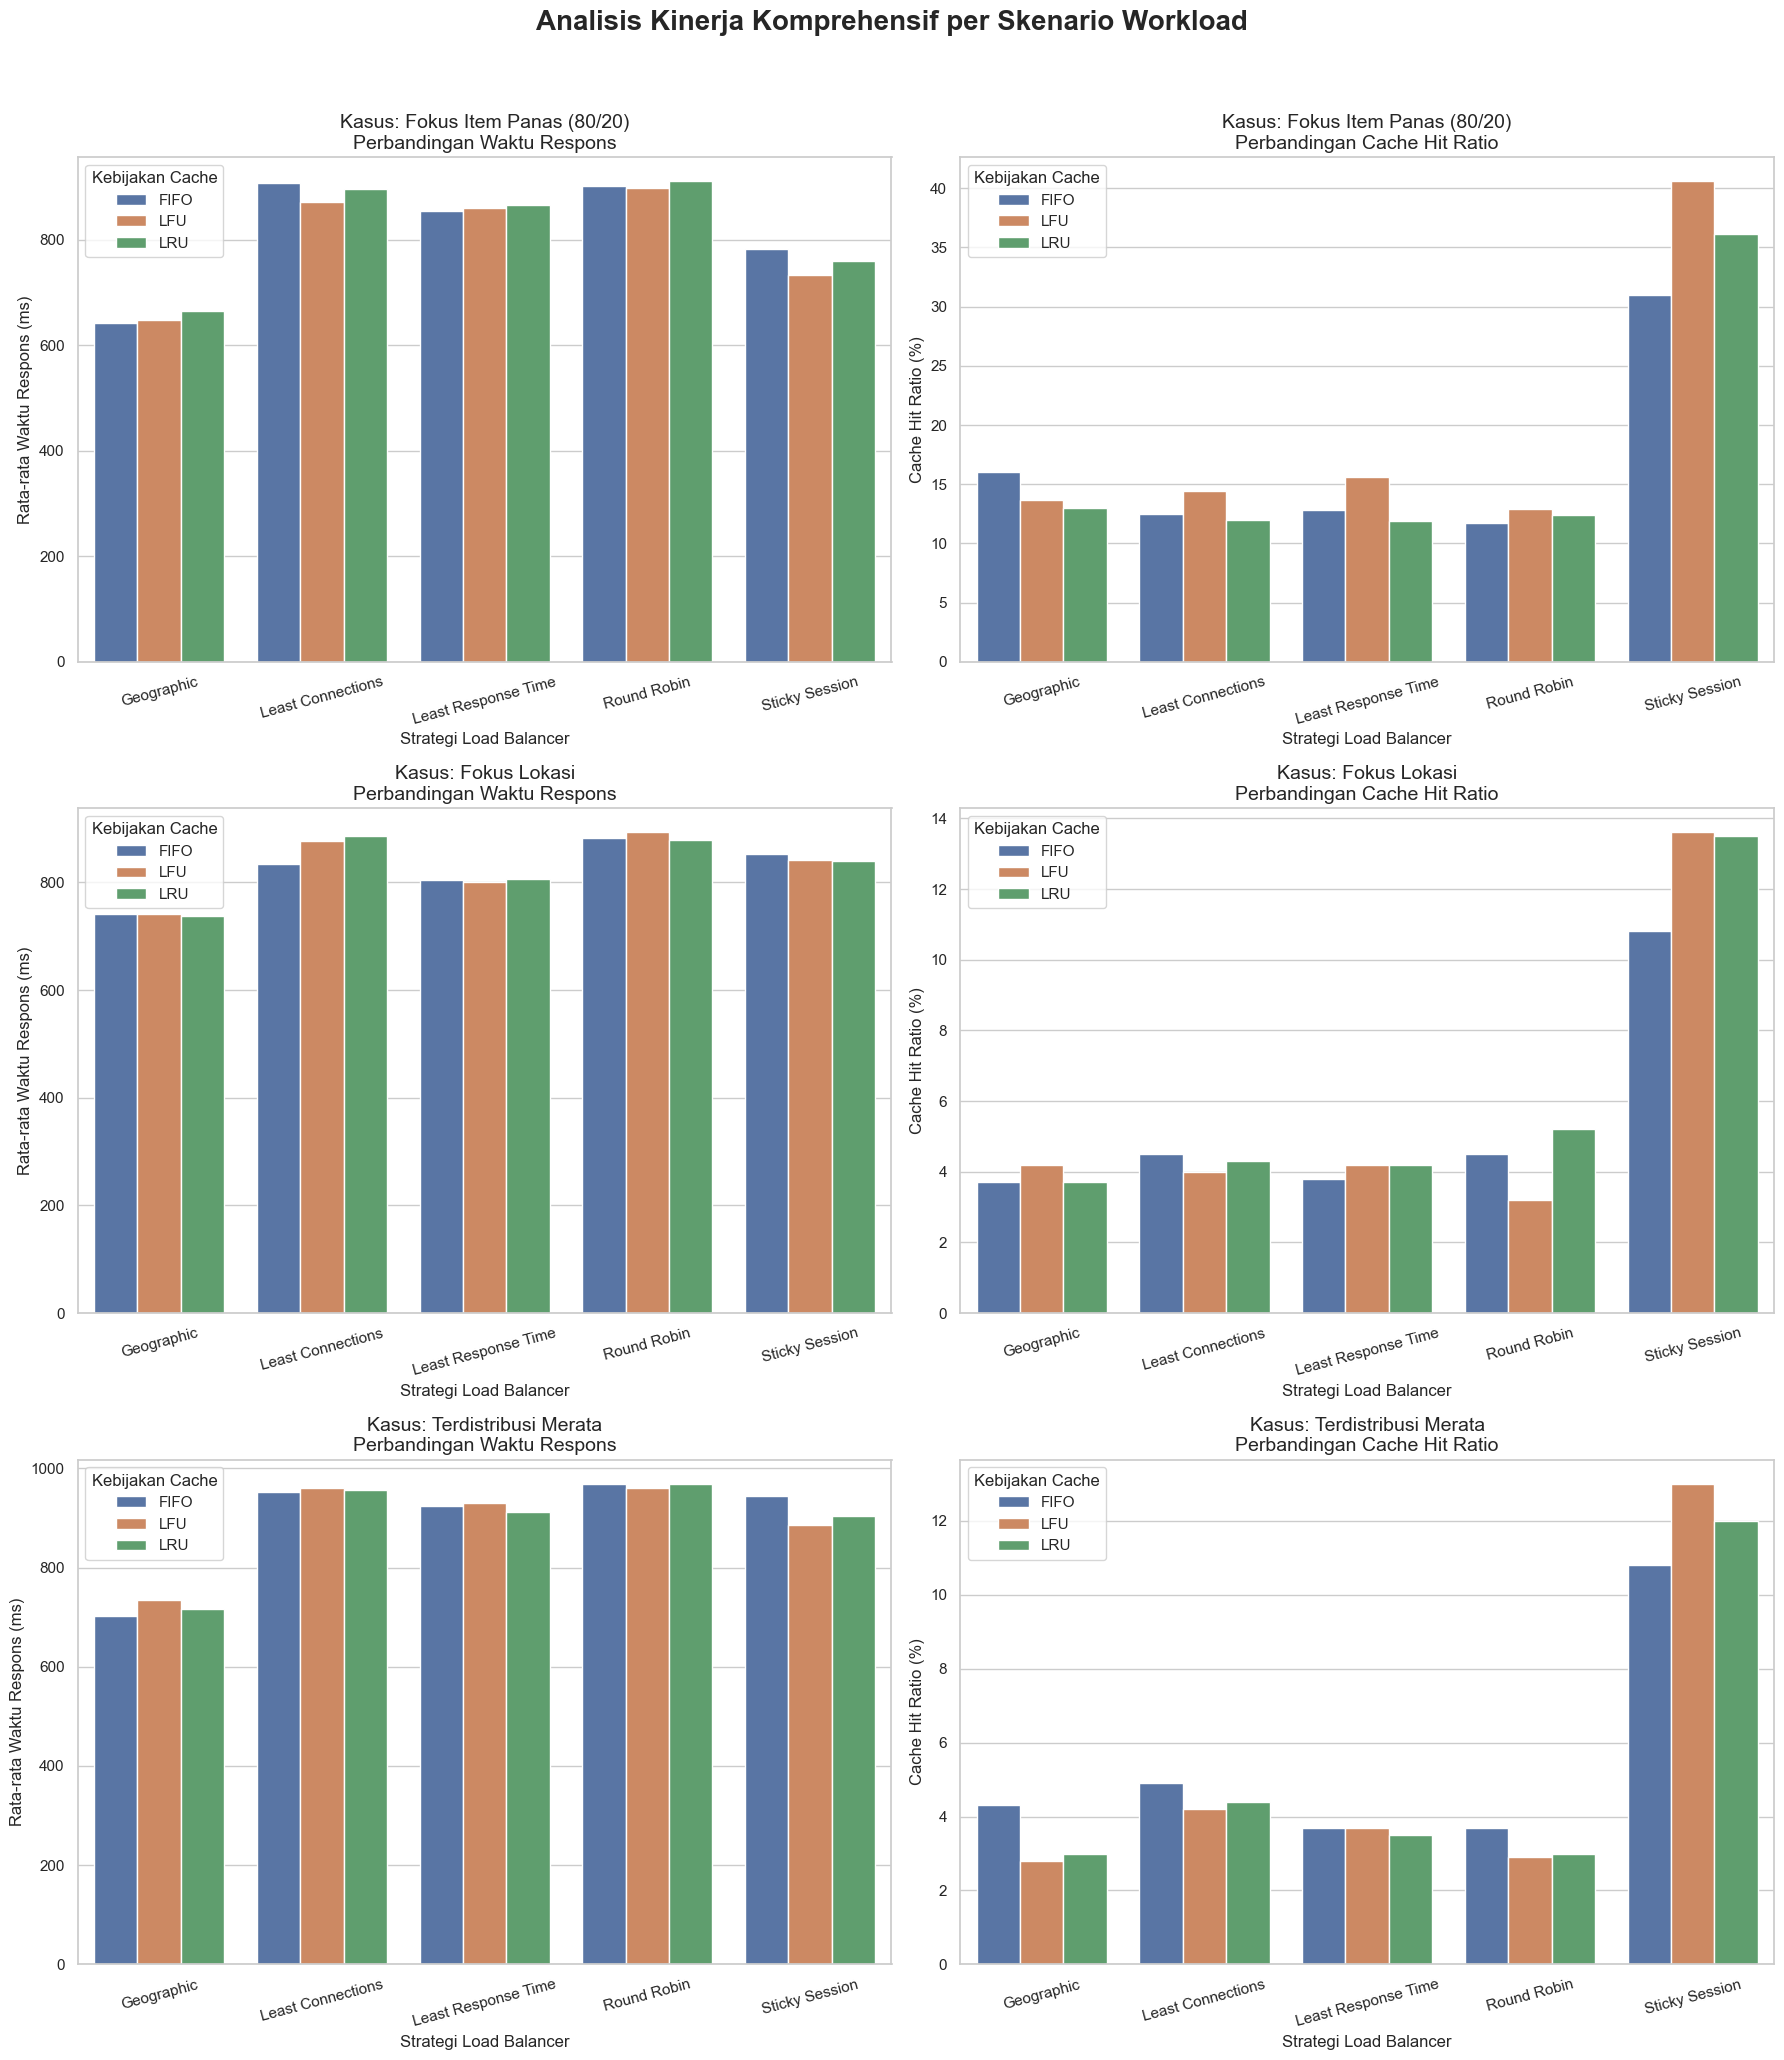

In [6]:
sns.set_theme(style="whitegrid")

sorted_df = df_results.sort_values(by=["Workload Case", "LB Strategy", "Cache Policy"])
cases = sorted_df["Workload Case"].unique()

fig, axes = plt.subplots(len(cases), 2, figsize=(18, len(cases) * 7))
fig.suptitle('Analisis Kinerja Komprehensif per Skenario Workload', fontsize=20, fontweight='bold')

for i, case in enumerate(cases):
    df_case = sorted_df[sorted_df["Workload Case"] == case]
    
    # Plot 1: Rata-rata Waktu Respons (kolom kiri)
    ax_resp = axes[i, 0]
    sns.barplot(
        data=df_case,
        x="LB Strategy",
        y="Avg Resp Time (ms)",
        hue="Cache Policy",
        ax=ax_resp
    )
    ax_resp.set_title(f'Kasus: {case}\nPerbandingan Waktu Respons', fontsize=14)
    ax_resp.set_xlabel('Strategi Load Balancer', fontsize=12)
    ax_resp.set_ylabel('Rata-rata Waktu Respons (ms)', fontsize=12)
    ax_resp.tick_params(axis='x', rotation=15)
    ax_resp.legend(title='Kebijakan Cache')

    # Plot 2: Cache Hit Ratio (kolom kanan)
    ax_cache = axes[i, 1]
    sns.barplot(
        data=df_case,
        x="LB Strategy",
        y="Cache Hit Ratio (%)",
        hue="Cache Policy",
        ax=ax_cache
    )
    ax_cache.set_title(f'Kasus: {case}\nPerbandingan Cache Hit Ratio', fontsize=14)
    ax_cache.set_xlabel('Strategi Load Balancer', fontsize=12)
    ax_cache.set_ylabel('Cache Hit Ratio (%)', fontsize=12)
    ax_cache.tick_params(axis='x', rotation=15)
    ax_cache.legend(title='Kebijakan Cache')

# Sesuaikan layout agar tidak tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()